In [46]:
import sqlite3

In [47]:
conn = sqlite3.connect("/home/niraj/Downloads/flights.db")

In [48]:
cur = conn.cursor()

In [49]:
cur.execute("select * from airlines limit 5;")

In [50]:
results=cur.fetchall()
print(results)

[(0, '1', 'Private flight', '\\N', '-', None, None, None, 'Y', None), (1, '2', '135 Airways', '\\N', None, 'GNL', 'GENERAL', 'United States', 'N', None), (2, '3', '1Time Airline', '\\N', '1T', 'RNX', 'NEXTIME', 'South Africa', 'Y', None), (3, '4', '2 Sqn No 1 Elementary Flying Training School', '\\N', None, 'WYT', None, 'United Kingdom', 'N', None), (4, '5', '213 Flight Unit', '\\N', None, 'TFU', None, 'Russia', 'N', None)]


In [51]:
cur.close()
conn.close()

In [52]:
import sqlite3

conn=sqlite3.connect("/home/niraj/Downloads/flights.db")
cur=conn.cursor()
coords=cur.execute("""
Select cast(longitude as float),cast(latitude as float) from airports;
""").fetchall()
           

In [56]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
%matplotlib inline

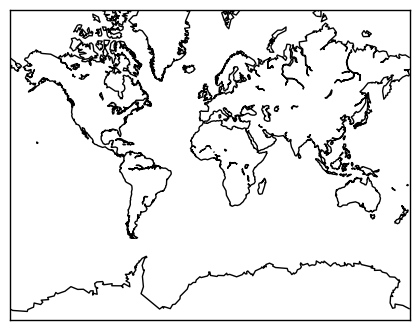

In [57]:
m = Basemap(
    projection = 'merc',
    llcrnrlat=-80,
    urcrnrlat=80,
    llcrnrlon=-180,
    urcrnrlon=180,
    lat_ts=20,
    resolution='c')

m.drawcoastlines()
m.drawmapboundary()

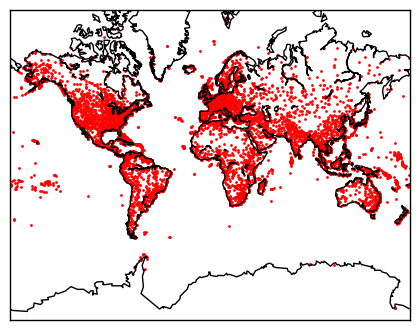

In [59]:
x,y = m(
    [l[0] for l in coords],
    [l[1] for l in coords]
)

m.scatter(
    x,
    y,
    1,
    marker='o',
    color='red'
)
m.drawcoastlines()
m.drawmapboundary()

In [60]:
import pandas as pd
import sqlite3

In [61]:
conn = sqlite3.connect("/home/niraj/Downloads/flights.db")

In [62]:
df = pd.read_sql_query("select * from airlines limit 5;",conn)

In [63]:
df

,index,id,name,alias,iata,icao,callsign,country,active,airplanes
0,0,1,Private flight,\N,-,None,None,None,Y,None
1,1,2,135 Airways,\N,None,GNL,GENERAL,United States,N,None
2,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y,None
3,3,4,2 Sqn No 1 Elementary Flying Training School,\N,None,WYT,None,United Kingdom,N,None
4,4,5,213 Flight Unit,\N,None,TFU,None,Russia,N,None


In [64]:
df['country']

0              None
1     United States
2      South Africa
3    United Kingdom
4            Russia
Name: country, dtype: object

In [65]:
rt = pd.read_sql_query("""
                            select cast(sa.longitude as float) as source_lon,
                            cast(sa.latitude as float) as source_lat,
                            cast(da.longitude as float) as dest_lon,
                            cast(da.latitude as float) as dest_lat
                            from routes
                            inner join airports sa on
                            sa.id=routes.source_id
                            inner join airports da on
                            da.id=routes.dest_id;
""",conn)

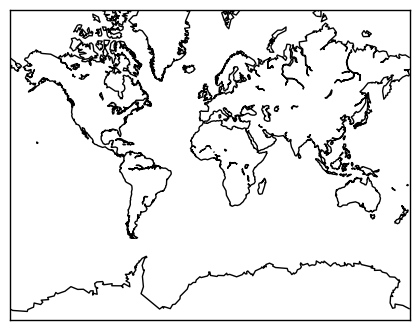

In [66]:
m = Basemap(
    projection = 'merc',
    llcrnrlat=-80,
    urcrnrlat=80,
    llcrnrlon=-180,
    urcrnrlon=180,
    lat_ts=20,
    resolution='c')

m.drawcoastlines()

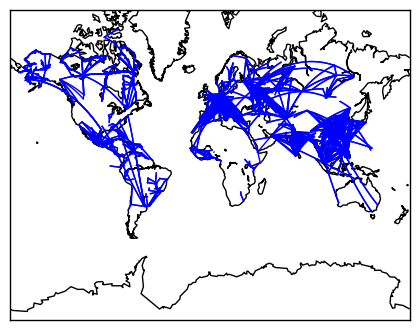

In [69]:

for name,row in rt[:3000].iterrows():
    if abs(row['source_lon']-row['dest_lon']) < 90:
        m.drawgreatcircle(
            row['source_lon'],
            row['source_lat'],
            row['dest_lon'],
            row['dest_lat'],
            linewidth=1,
            color='b'
        )
m.drawcoastlines()
m.drawmapboundary()        

In [102]:
cur = conn.cursor()
cur.execute("insert into airlines values (6048, 19846, 'Test flight', '', '', null, null, null, 'Y',122)")

In [103]:
conn.commit()

In [104]:
pd.read_sql_query("select * from airlines where id=19846;", conn)

,index,id,name,alias,iata,icao,callsign,country,active,airplanes
0,6048,19846,Test flight,,,None,None,None,Y,NaN
1,6048,19846,Test flight,,,None,None,None,Y,122.0


In [105]:
cur=conn.cursor()
values=("Test Flight",'Y')
cur.execute("insert into airlines values(6049,19847,?,'','',null,null,null,?,122)",values)
conn.commit()

In [106]:
cur = conn.cursor()
values = ('USA', 19847)
cur.execute("update airlines set country=? where id=?", values)
conn.commit()

In [107]:
pd.read_sql_query("select * from airlines where id=19847;", conn)

,index,id,name,alias,iata,icao,callsign,country,active,airplanes
0,6049,19847,Test Flight,,,None,None,USA,Y,122


In [108]:
cur=conn.cursor()
values=(19847,)
cur.execute("delete from airlines where id=?",values)
conn.commit()

In [109]:
pd.read_sql_query("select * from airlines where id=19847;",conn)

,index,id,name,alias,iata,icao,callsign,country,active,airplanes


In [111]:
cur.execute("create table daily_flights(id integer,departure date,arrival date,number text,route_id integer)")
conn.commit()

In [113]:
cur.execute("insert into daily_flights values(1,'2016-09-29 0:00','2016-09-28 12:00','T1',1)")

In [114]:
conn.commit()

In [115]:
pd.read_sql_query("select * from daily_flights",conn)

,id,departure,arrival,number,route_id
0,1,2016-09-29 0:00,2016-09-28 12:00,T1,1


In [116]:
from datetime import datetime
df = pd.DataFrame([[1,datetime(2016,9,28,0,0),datetime(2016,9,28,12,0),'T1',1]],
                 columns=['id','departure','arrival','number','route_id'])

In [117]:
df.to_sql("daily_flights",conn,if_exists="replace")

In [118]:
pd.read_sql_query("select * from daily_flights;", conn)

,index,id,departure,arrival,number,route_id
0,0,1,2016-09-28 00:00:00,2016-09-28 12:00:00,T1,1


In [120]:
pd.read_sql_query("select * from airlines limit 1;",conn)

,index,id,name,alias,iata,icao,callsign,country,active,airplanes
0,0,1,Private flight,\N,-,None,None,None,Y,None


In [121]:
df=pd.read_sql("select * from daily_flights",conn)
df['delay_minutes']=None
df.to_sql("daily_flights",conn,if_exists="replace")

In [122]:
pd.read_sql_query("select * from daily_flights",conn)

,level_0,index,id,departure,arrival,number,route_id,delay_minutes
0,0,0,1,2016-09-28 00:00:00,2016-09-28 12:00:00,T1,1,None
